In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [37]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.607736572355265 42.367134105733385
-14.813716038317693 -172.68297115414018
-3.6291400928165416 -69.54718825614661
-83.86221074000517 144.0145025941897
63.273801658872 -2.2619737619390605
70.46392938121659 -43.36376839156361
88.33623846037551 -82.47608737648368
-83.86621481538165 -71.54447711499367
60.71182282386394 76.05647377332849
3.2440001199400115 51.368651363876666
-21.0844559682712 79.5784088648764
-20.811265782472915 -164.34836542035887
-80.22117660875129 120.96923569997944
-20.20075050276641 -68.56348537951439
51.00964186087657 63.56763611729198
67.21792054068413 -46.74871473109178
19.41956513406444 175.03776393694335
40.54818294166253 133.9431048960867
-53.830250112161934 80.86366322537532
83.69182641261347 140.6399072664331
-77.86043257262234 98.88722734169085
33.98229549540049 176.75949053129864
16.22209083421768 18.690983032872992
-80.43008474458075 179.72547969384755
9.282885683987402 -66.768211127253
-8.229810345190657 -82.2945240151035
64.84527350688361 -170.270438519

79.46374477701875 -157.144066759662
83.50096955487962 -3.0112041294094354
-41.476566884812364 65.90065414051625
26.847977645585047 -13.944292972263383
-17.998373156071324 68.87643808921564
-41.09726489349653 26.647590158304922
-81.60390921740444 -64.90367607377786
-28.778772472477186 -128.86403403871714
42.0474514356076 -137.04465447859388
-89.56081416622045 -123.57833581353538
19.664656059829625 78.76838599399741
87.96311375928988 7.932155510029048
-59.82208434542251 38.09294589472026
-48.20613719957668 -19.08973917155643
80.43837848387042 19.108971622214852
-66.07051991952758 -84.92725900956034
54.77229302192862 5.06888567756431
-23.925137656190046 -123.93161996866911
-3.913657367484305 155.81175093629122
-41.968993752894114 159.39960335539854
-79.9685916214095 -7.561690333590036
-73.54298771184969 45.6404855932976
-25.820484940344585 0.16091289841949674
13.534173776086632 -98.9988021201578
-55.99976634584298 -121.0603380068753
72.99368639338431 -153.22902540203614
-37.72219389283351

In [5]:
from citipy import citipy

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sakakah
Processing Record 2 of Set 1 | taga
Processing Record 3 of Set 1 | leticia
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | megion
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | iquique
Processing Record 15 of Set 1 | kushmurun
Processing Record 16 of Set 1 | qasigiannguit
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | vrangel
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | faya
Processing Record 23 of Set 1 | k

Processing Record 40 of Set 4 | balykshi
Processing Record 41 of Set 4 | xining
Processing Record 42 of Set 4 | hit
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | amposta
Processing Record 45 of Set 4 | nuuk
Processing Record 46 of Set 4 | zhoucheng
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | kamloops
Processing Record 50 of Set 4 | wagrowiec
Processing Record 1 of Set 5 | calama
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | catamarca
Processing Record 5 of Set 5 | yushan
Processing Record 6 of Set 5 | teteven
Processing Record 7 of Set 5 | ushumun
Processing Record 8 of Set 5 | moindou
Processing Record 9 of Set 5 | artyk
City not found. Skipping...
Processing Record 10 of Set 5 | eyrarbakki
Processing Record 11 of Set 5 | bakchar
Processing Record 12 of Set 5 | ishigaki
Processing Record 13 of Set 5 | sorland
Processi

Processing Record 26 of Set 8 | lata
Processing Record 27 of Set 8 | miyako
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | marsh harbour
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | tyret pervaya
Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | sao joao da barra
Processing Record 35 of Set 8 | numan
Processing Record 36 of Set 8 | mali zvornik
Processing Record 37 of Set 8 | ati
Processing Record 38 of Set 8 | khao wong
Processing Record 39 of Set 8 | abha
Processing Record 40 of Set 8 | turbat
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | dalaba
Processing Record 43 of Set 8 | kaniama
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | nanortalik
Processing Record 46 of Set 8 | mayo
Processing Record 47 of Set 8 | pueblo nuevo
Processing Record 48 of Set 8 | antofagasta
Processing Record 49 of Set 8 | kamai

Processing Record 15 of Set 12 | terrace bay
Processing Record 16 of Set 12 | saurimo
Processing Record 17 of Set 12 | yertsevo
Processing Record 18 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 19 of Set 12 | san ramon
Processing Record 20 of Set 12 | bodden town
Processing Record 21 of Set 12 | san julian
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | heihe
Processing Record 24 of Set 12 | rorvik
Processing Record 25 of Set 12 | warrington
Processing Record 26 of Set 12 | porto belo
Processing Record 27 of Set 12 | trojes
Processing Record 28 of Set 12 | wasilla
Processing Record 29 of Set 12 | sabzevar
Processing Record 30 of Set 12 | high level
Processing Record 31 of Set 12 | macia
Processing Record 32 of Set 12 | saint-louis
Processing Record 33 of Set 12 | caravelas
Processing Record 34 of Set 12 | marzuq
Processing Record 35 of Set 12 | kaeo
Processing Record 36 of Set 12 | touros
Processing Record 37 of Set 12 | hashtrud
Proce

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sakakah,29.9697,40.2064,90.97,15,0,10.60,SA,2022-06-08 20:51:40
1,Taga,46.9500,24.0500,68.32,75,26,3.53,RO,2022-06-08 20:51:40
2,Leticia,-4.2153,-69.9406,86.05,66,75,4.61,CO,2022-06-08 20:50:10
3,Hobart,-42.8794,147.3294,47.05,70,40,11.50,AU,2022-06-08 20:50:30
4,Brae,60.3964,-1.3530,49.57,85,100,18.66,GB,2022-06-08 20:51:41
5,Tasiilaq,65.6145,-37.6368,38.48,70,9,2.73,GL,2022-06-08 20:51:41
6,Qaanaaq,77.4840,-69.3632,31.71,86,89,3.49,GL,2022-06-08 20:48:53
7,Ushuaia,-54.8000,-68.3000,37.02,93,100,19.57,AR,2022-06-08 20:46:50
8,Megion,61.0296,76.1136,53.62,58,100,10.42,RU,2022-06-08 20:51:42
9,Hobyo,5.3505,48.5268,80.53,74,100,22.12,SO,2022-06-08 20:51:42


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sakakah,SA,2022-06-08 20:51:40,29.9697,40.2064,90.97,15,0,10.60
1,Taga,RO,2022-06-08 20:51:40,46.9500,24.0500,68.32,75,26,3.53
2,Leticia,CO,2022-06-08 20:50:10,-4.2153,-69.9406,86.05,66,75,4.61
3,Hobart,AU,2022-06-08 20:50:30,-42.8794,147.3294,47.05,70,40,11.50
4,Brae,GB,2022-06-08 20:51:41,60.3964,-1.3530,49.57,85,100,18.66
...,...,...,...,...,...,...,...,...,...
580,Ormstown,CA,2022-06-08 21:07:28,45.1334,-73.9992,75.09,67,74,9.28
581,Batang Berjuntai,MY,2022-06-08 21:07:29,3.3833,101.4167,74.44,91,99,2.33
582,Makakilo City,US,2022-06-08 21:07:29,21.3469,-158.0858,83.95,50,0,18.41
583,Aksu,CN,2022-06-08 21:07:30,41.1231,80.2644,73.42,19,2,4.59


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

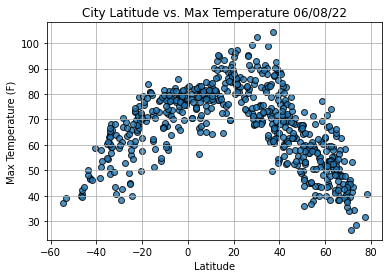

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

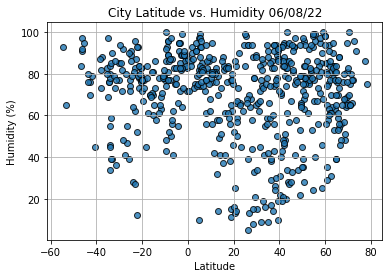

In [39]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

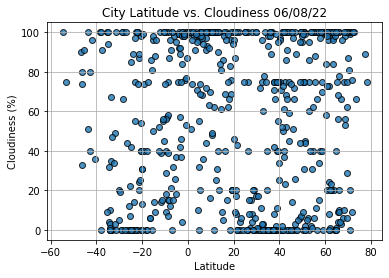

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

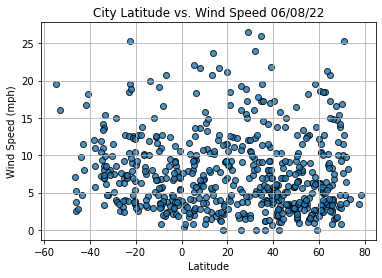

In [40]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Iquique
Country                        CL
Date          2022-06-08 20:51:43
Lat                      -20.2208
Lng                      -70.1431
Max Temp                    62.64
Humidity                       77
Cloudiness                     13
Wind Speed                   6.58
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

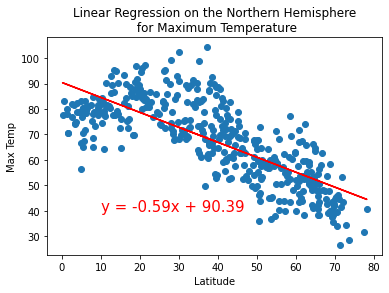

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

In [22]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.5868789774993651, intercept=90.38946630068352, rvalue=-0.7564116665785192, pvalue=2.0587336027467603e-77, stderr=0.025094010709512424, intercept_stderr=1.0985760407598903)

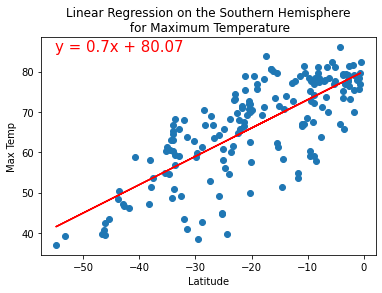

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,85))

In [24]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.7028821856601885, intercept=80.07469944588624, rvalue=0.7608667034362052, pvalue=3.944215982608574e-34, stderr=0.04570808221249114, intercept_stderr=1.074360790803606)

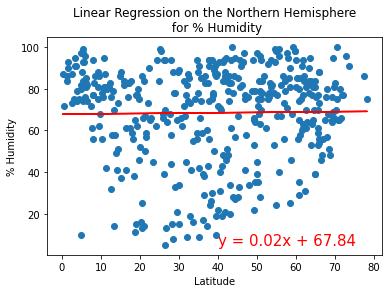

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,5))

In [26]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.017140072818091448, intercept=67.83739264704832, rvalue=0.015438655710567094, pvalue=0.7549984973983671, stderr=0.05488956166727645, intercept_stderr=2.402978066500317)

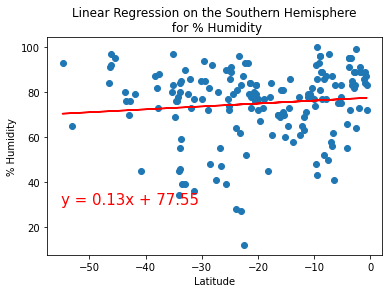

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-55,30))

In [28]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.12980249165309754, intercept=77.54734286545265, rvalue=0.10345520365887043, pvalue=0.17431150318286842, stderr=0.09515460621529408, intercept_stderr=2.236593027614085)

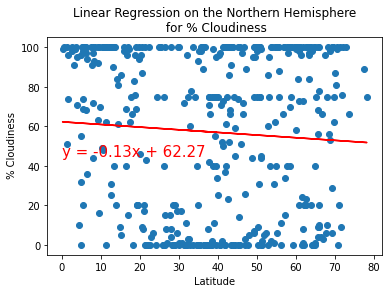

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', ' % Cloudiness',(0,45))

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.13391821778650792, intercept=62.27172382550726, rvalue=-0.0680460609118142, pvalue=0.16854259575248837, stderr=0.09708837514652355, intercept_stderr=4.250375279063997)

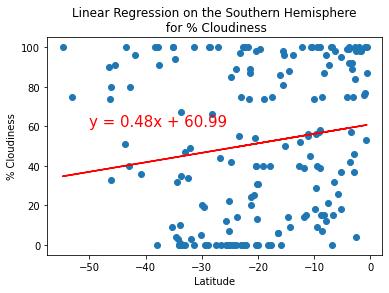

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.47988540506571914, intercept=60.992348986869615, rvalue=0.16277340640077403, pvalue=0.031874127546042436, stderr=0.22179866039972793, intercept_stderr=5.213340237694584)

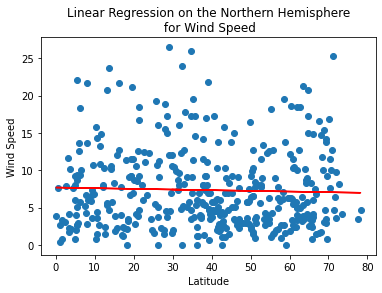

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(45,32))

In [34]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.008954813336541278, intercept=7.683529438167268, rvalue=-0.03434160411830736, pvalue=0.48749635609235986, stderr=0.012885998103923244, intercept_stderr=0.5641285859849108)

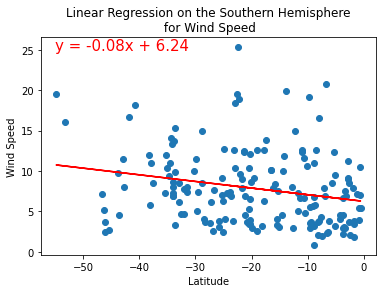

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-55,25))

In [36]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.08218486056911899, intercept=6.242659001504602, rvalue=-0.23312836774724224, pvalue=0.001962960750149226, stderr=0.026139540985589425, intercept_stderr=0.6144055179118081)